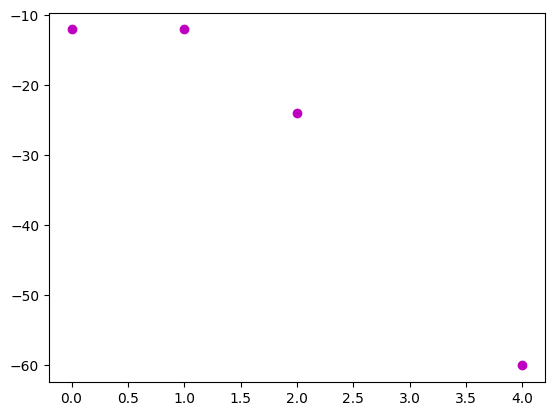

In [4]:
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import numpy as np
import scipy.interpolate as interpolate

N = 4
xi = np.array([0,1,2,4]) # independent data points
yi = np.array([-12,-12,-24,-60]) # dependent data points
plt.plot(xi,yi,"mo")

[  1.  -9.   8. -12.] [[ 0.  0.  0.  1.]
 [ 1.  1.  1.  1.]
 [ 8.  4.  2.  1.]
 [64. 16.  4.  1.]] [-12 -12 -24 -60]


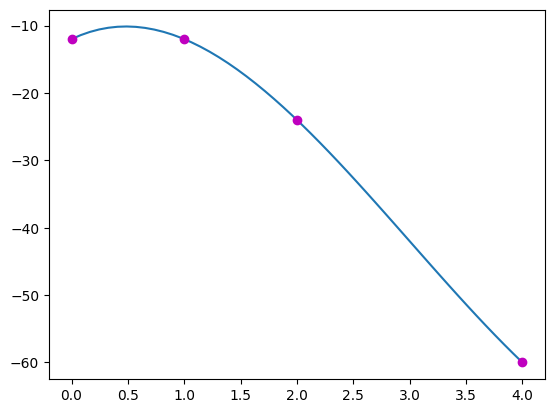

In [5]:
# solve for interpolating function using matrix method

M = np.column_stack( (xi**3,xi**2,xi,np.ones(N))) # create Vandermonde matrix
a = linalg.solve(M, yi) # solve M.a = y for a knowing vector y & matrix m
print(a, M, yi)

x = np.linspace(xi[0], xi[3], num=50, dtype=float) # interpolating function indep variable
y = a[3]+a[2]*x+a[1]*x**2+a[0]*x**3 # interpolating function dep variable

plt.plot(x,y)
plt.plot(xi,yi,"mo")

(50,)

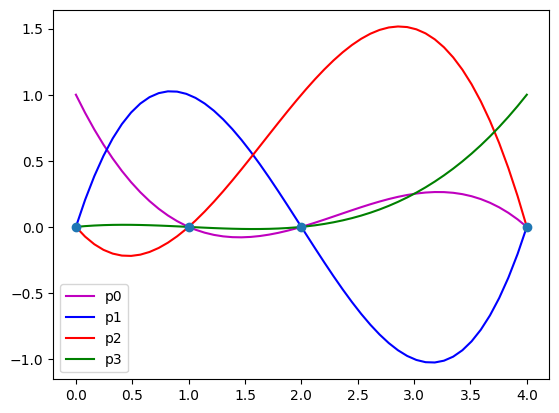

In [6]:
# solve for interpolatiing function using lagrange polynomials

# P0 =(x-x1)(x-x2)(x-x3)/( (x0-x1)(x0-x2)(x0-x3) ) lagrange basis polynomial c_0, i.e. i=0, m=1,2,3
# P1 =(x-x0)(x-x2)(x-x3)/( (x1-x0)(x1-x2)(x1-x3) ) lagrange basis polynomial c_0, i.e. i=1, m=0,2,3
# P2 =(x-x0)(x-x1)(x-x3)/( (x2-x0)(x2-x1)(x2-x3) ) etc
# P3 =(x-x0)(x-x1)(x-x2)/( (x3-x0)(x3-x1)(x3-x2) )

p0 = (x-xi[1])*(x-xi[2])*(x-xi[3])/( (xi[0]-xi[1])*(xi[0]-xi[2])*(xi[0]-xi[3]) )
p1 = (x-xi[0])*(x-xi[2])*(x-xi[3])/( (xi[1]-xi[0])*(xi[1]-xi[2])*(xi[1]-xi[3]) )
p2 = (x-xi[0])*(x-xi[1])*(x-xi[3])/( (xi[2]-xi[0])*(xi[2]-xi[1])*(xi[2]-xi[3]) )
p3 = (x-xi[0])*(x-xi[1])*(x-xi[2])/( (xi[3]-xi[0])*(xi[3]-xi[1])*(xi[3]-xi[2]) )

# note values of polynomials at data points x0, x1, x2, x3
plt.plot(x,p0,"m-",label="p0")
plt.plot(x,p1,"b-",label="p1")
plt.plot(x,p2,"r-",label="p2")
plt.plot(x,p3,"g-",label="p3")
plt.plot(xi,yi-yi,"o")
plt.legend()
np.shape(p0)

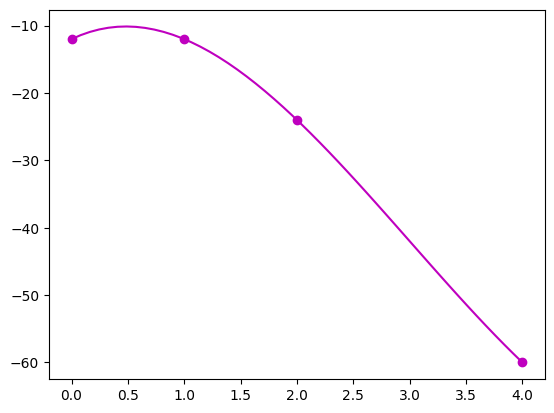

In [7]:
# solve for interpolatiing function using lagrange polynomials

L = p0*yi[0]+p1*yi[1]+p2*yi[2]+p3*yi[3] # construct lagrane polynomial from basis polynomials
plt.plot(xi,yi,"mo")
plt.plot(x,L,"m-")

   3     2
1 x - 9 x + 8 x - 12


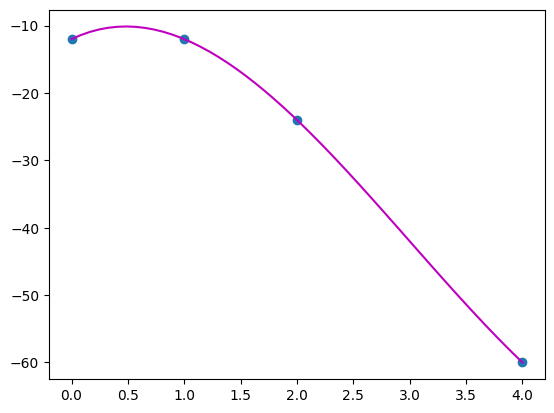

In [9]:
# solve for interpolatiing function using scipy lagrange interpolation package

poly = interpolate.lagrange(xi, yi)
plt.plot(xi, yi, "o", x, poly(x), "m-")
print(poly)